# Bike Sharing Dataset ( Hourly basis)

## IMPORTING LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
hour=pd.read_csv('hour.csv')

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## PRE PROCESSING

Droping irrelevent columns

In [4]:
hour.drop(['instant','dteday','casual','mnth','registered'],axis=1,inplace=True)

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [6]:
hour.isna().sum()

season        0
yr            0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- Data have no null values
- Data is already normalized

In [7]:
hour.describe()

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


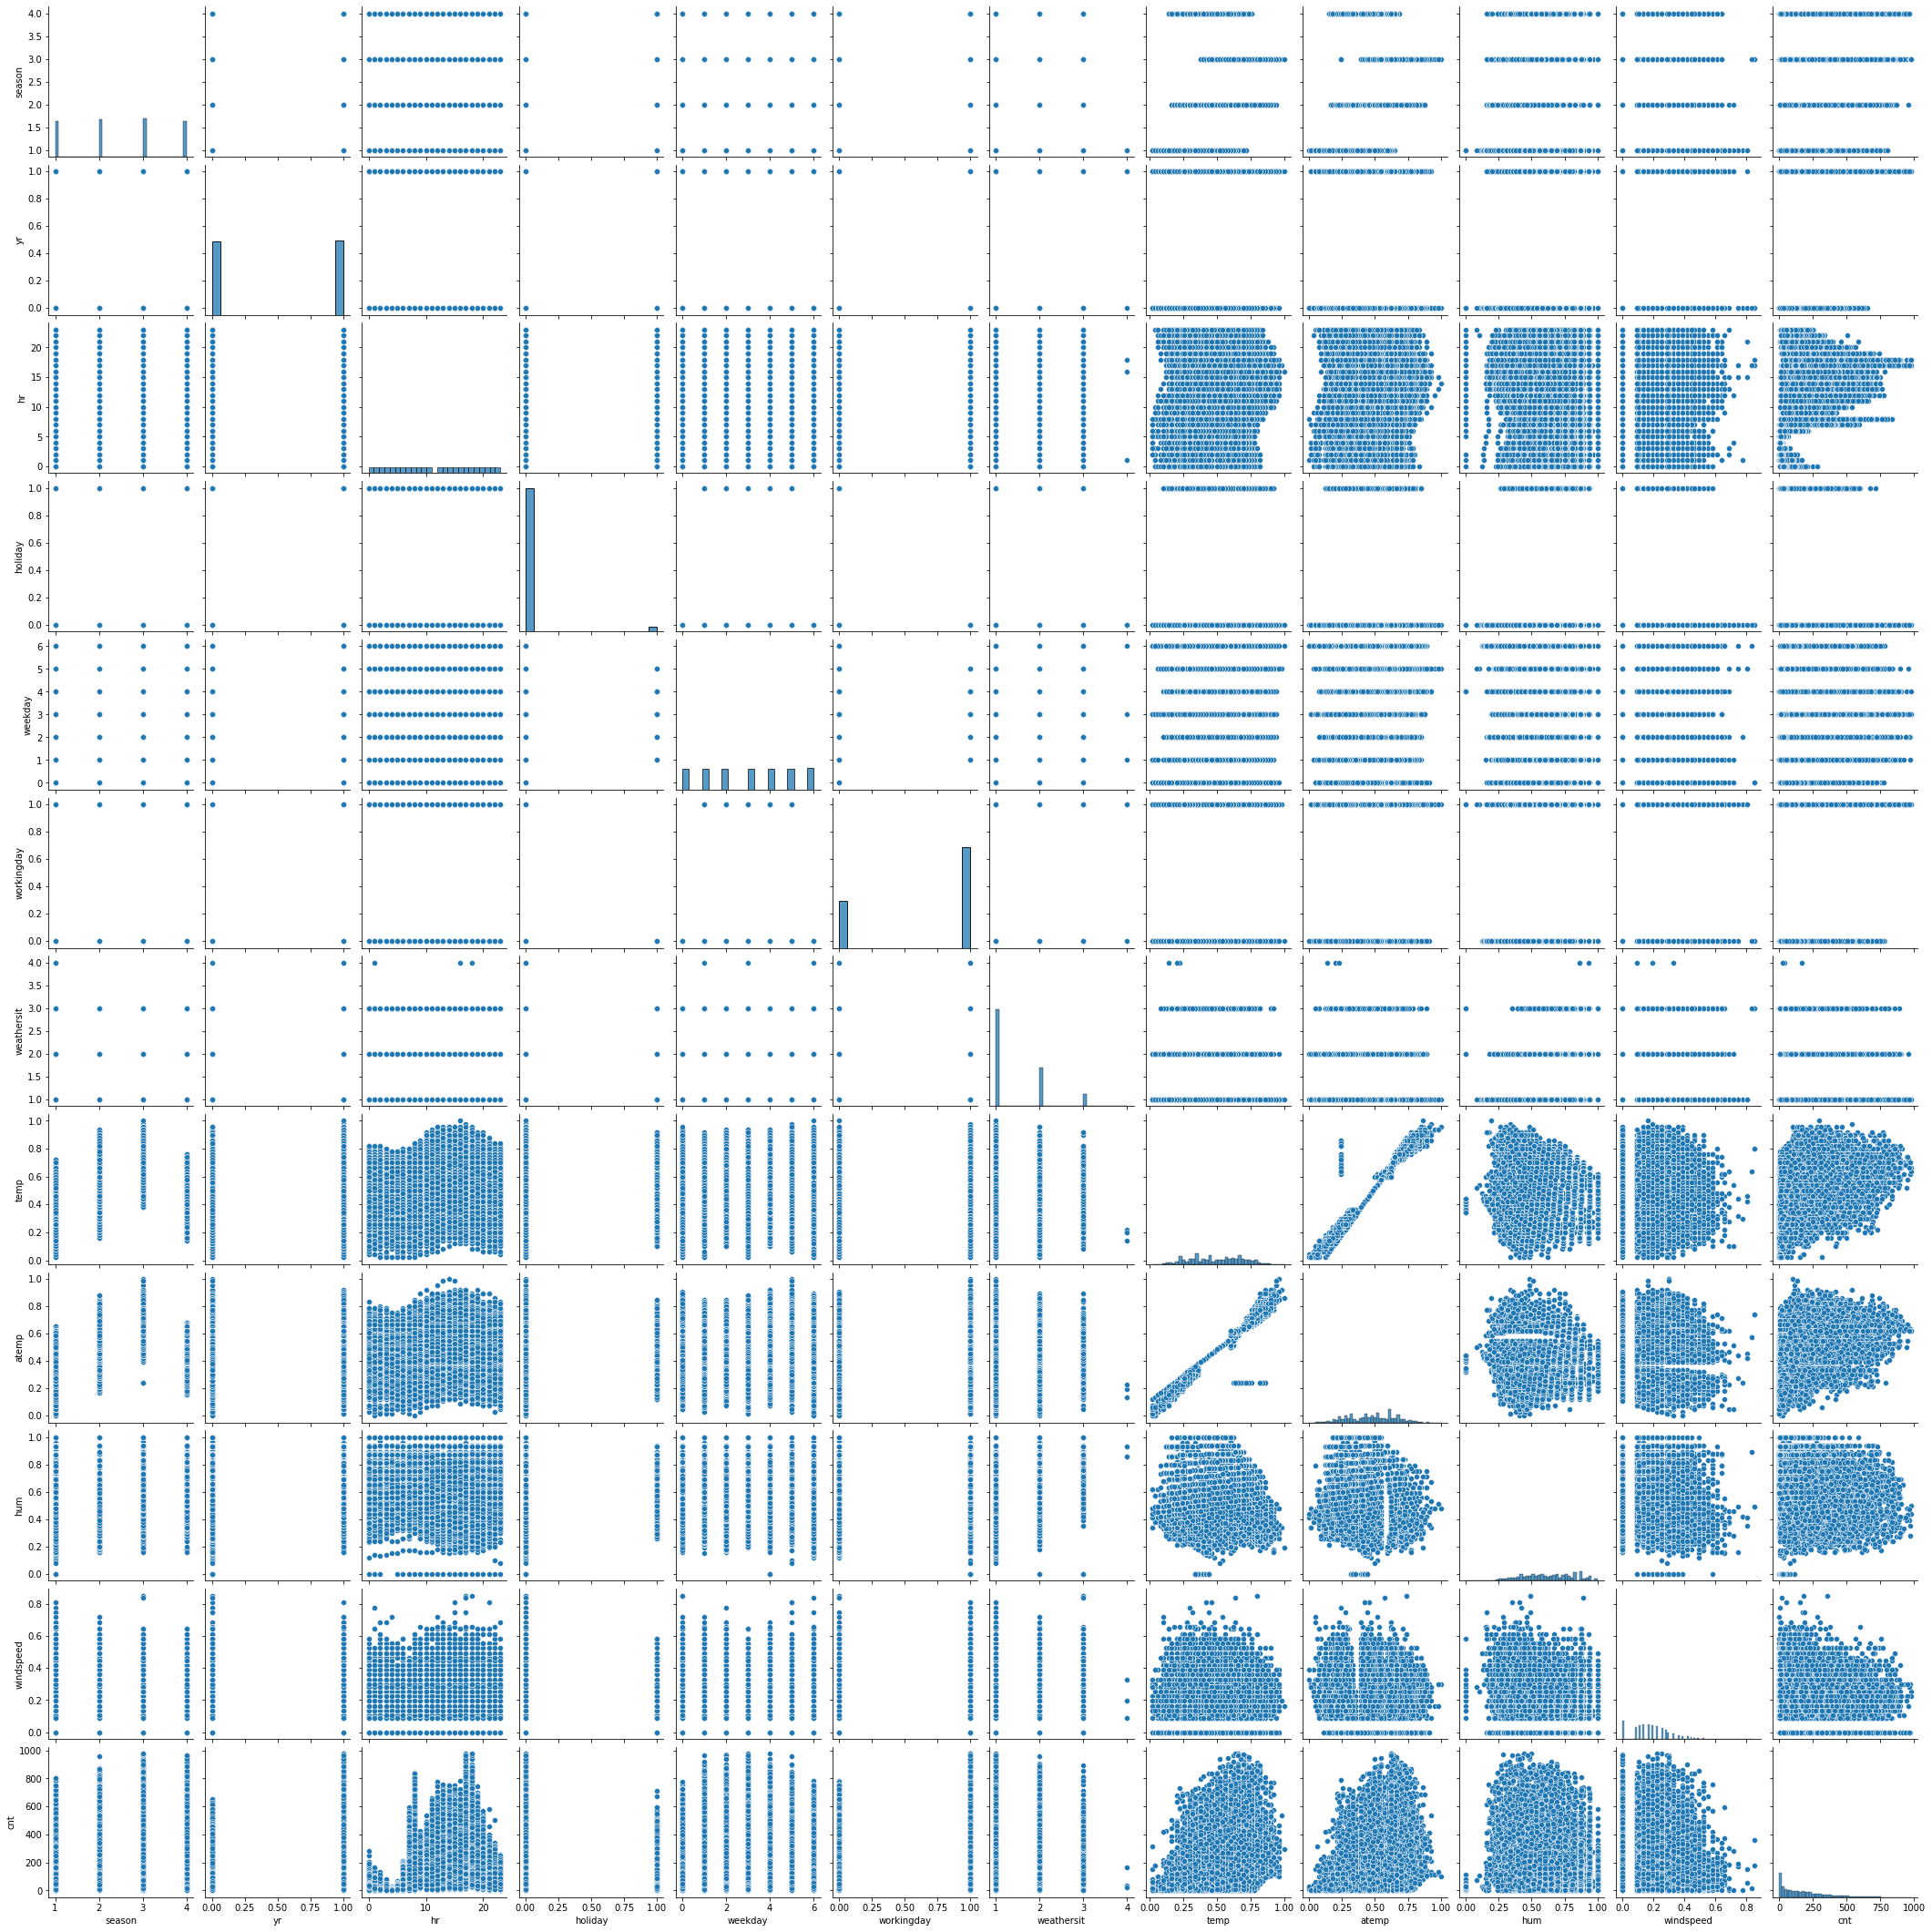

In [8]:
sns.pairplot(hour)

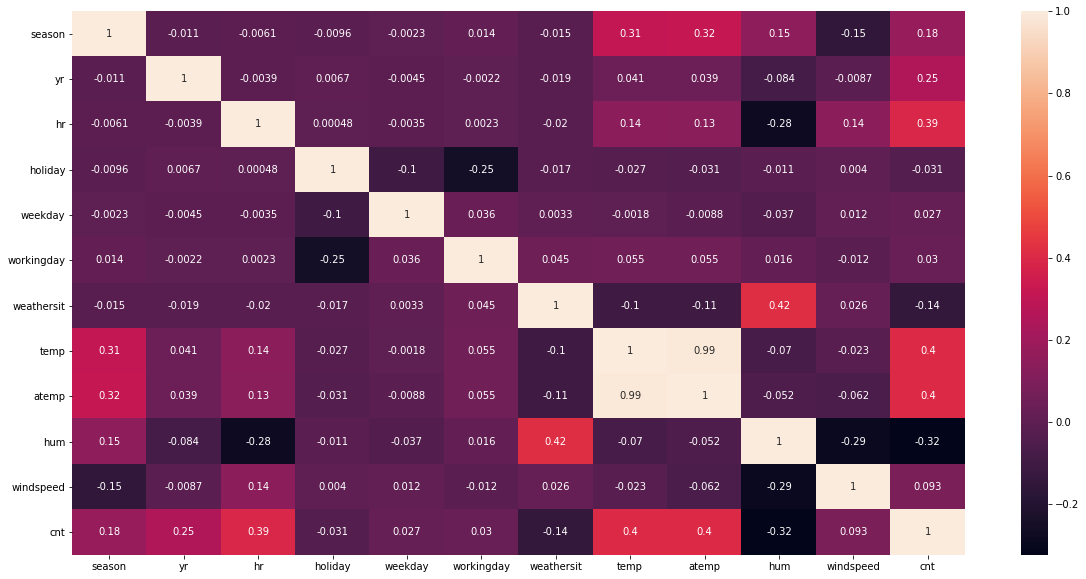

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=hour.corr(),annot=True)
plt.show()

From above we can conclude that 
- temp and atemp is correlated to each other
- None of the column is Highly correlated with cnt so Linear Regression will not give good accuracy
- Rest, Data looks fine is ready for modeling

In [11]:
X=hour.drop(['cnt','atemp'],axis=1)
y=hour['cnt']

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=100)

## MACHINE LEARNING MODELS

#### Creating Regressor and Grid Function

In [13]:
def Regressor(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Training Score :',model.score(X_train,y_train))
    print('Testing Score :',model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    print('MSE :',mean_squared_error(y_test, y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score :',r2_score(y_test, y_pred))
    plt.scatter(y_pred,y_test,alpha=0.5)

In [14]:
def Grid(model,X_train,y_train,X_test,y_test,para):
    model1=GridSearchCV(model, param_grid=para, n_jobs=-1,cv=5)
    Regressor(model1,X_train,X_test,y_train,y_test)
    print("Best Hyper Parameters:\n",model1.best_params_)

### Modeling

Using Decision Tree and RandomForest Regressor without and with Hyperparameter tuning and comparing them

#### Decision Tree Regressor

Training Score : 0.99996736247372
Testing Score : 0.8949015647792028
MSE : 3427.867160529344
RMSE : 58.54799023475822
R2 Score : 0.8949015647792027


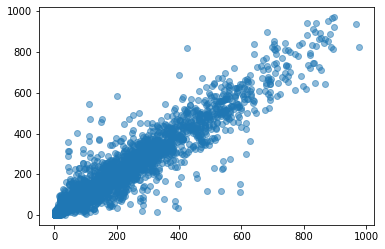

In [15]:
Dt_model=DecisionTreeRegressor()
Regressor(Dt_model,X_train,y_train,X_test,y_test)

#### Decision Tree Regressor with Hyperparamter tuning

Training Score : 0.9190737350127418
Testing Score : 0.9062834544702406
MSE : 3056.6379808112083
RMSE : 55.286869877134556
R2 Score : 0.9062834544702406
Best Hyper Parameters:
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 12, 'splitter': 'best'}


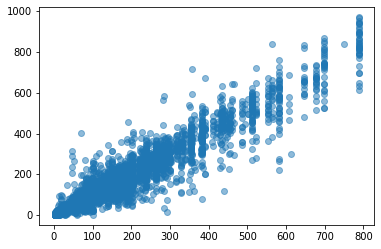

In [16]:
D_para = {
          'splitter':['best', 'random'],
          'max_depth': [4,5,6,7,8,9,10],
          'min_samples_split': [i for i in range(2,15,1)], 
          'min_samples_leaf':[i for i in range(2,15,1)]}
Grid(Dt_model,X_train,X_test,y_train,y_test,D_para)

#### RandomForest Regressor

Training Score : 0.9914039806061671
Testing Score : 0.9428997125101003
MSE : 1862.370262052003
RMSE : 43.15518812439593
R2 Score : 0.9428997125101003


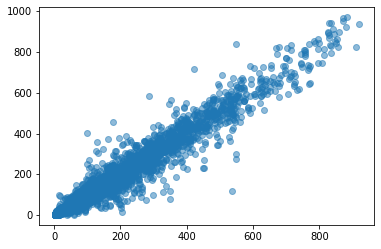

In [17]:
R_model= RandomForestRegressor()
Regressor(R_model,X_train,y_train,X_test,y_test)

#### RandomForest Regressor with hyperparameter tuning

Training Score : 0.9814115732270902
Testing Score : 0.9428657706331698
MSE : 1863.4773027520162
RMSE : 43.168012494809346
R2 Score : 0.9428657706331697
Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150, 'n_jobs': -1}


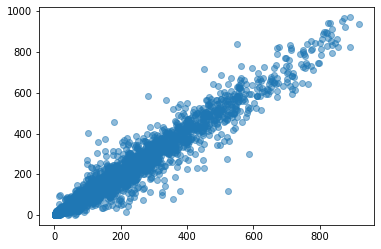

In [18]:
R_para = {
          'n_estimators':[25,50,75,100,125,150],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7],
         'n_jobs':[-1],
        }
Grid(R_model,X_train,X_test,y_train,y_test,R_para)

## DEEP LEARNING MODEL

In [19]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
# create model
model = Sequential()
model.add(Dense(1000, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_79 (Dense)             (None, 400)               400400    
_________________________________________________________________
dense_80 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 101       
Total params: 451,601
Trainable params: 451,601
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, validation_split=0.1,epochs=100 , batch_size=100, verbose= 1)

Epoch 1/100
126/126 [==============================] - 1s 9ms/step - loss: 2734.2734 - val_loss: 3326.8091
Epoch 2/100
126/126 [==============================] - 1s 9ms/step - loss: 2748.1724 - val_loss: 2923.5742
Epoch 3/100
126/126 [==============================] - 1s 9ms/step - loss: 2893.8391 - val_loss: 3258.7993
Epoch 4/100
126/126 [==============================] - 1s 9ms/step - loss: 2677.2917 - val_loss: 3373.2117
Epoch 5/100
126/126 [==============================] - 1s 9ms/step - loss: 2608.2800 - val_loss: 2645.9846
Epoch 6/100
126/126 [==============================] - 1s 9ms/step - loss: 2744.3396 - val_loss: 2637.2693
Epoch 7/100
126/126 [==============================] - 1s 9ms/step - loss: 2447.6584 - val_loss: 4571.5537
Epoch 8/100
126/126 [==============================] - 1s 9ms/step - loss: 2509.9890 - val_loss: 2904.2466
Epoch 9/100
126/126 [==============================] - 1s 9ms/step - loss: 2584.8542 - val_loss: 2743.6653
Epoch 10/100
126/126 [===============

In [46]:
y_pred = model.predict(X_test)

MSE : 2174.8274535106652
RMSE : 46.63504533621325
R2 Score : 0.9333197724605217


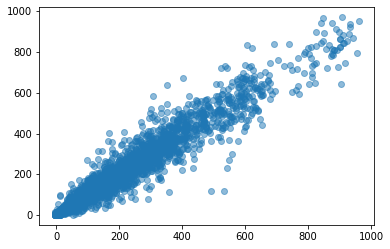

In [48]:
print('MSE :',mean_squared_error(y_test, y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test, y_pred))
plt.scatter(y_pred,y_test,alpha=0.5)

By Comparing 4 models we come up with a best model which is RandomForest Regressor with
- MSE : 1799.97
- RMSE : 42.43
- R2 Score : 0.95
- Best Hyper Parameters:
 {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150, 'n_jobs': -1}
 - hour is most important feature followed by temperature, year, working day